# Popular Data Science Questions

In this project, we're working for a fictional company that creates data science content, be it books, online articles, videos or interactive text-based platforms like Dataquest. We're tasked with figuring out what is best content to write about by answering: "What is it that people want to learn about in data science?"

To do this, we will be looking at Stack Exchange sites to get a sense of this.

## Data Science Stack Exchange

On this [site](https://datascience.stackexchange.com/), we see quite a few questions regarding specific problems to implementations.

On the site, we also see tags, unanswered questions, user data, and jobs. Unanswered questions in particular seems interesting to address. In each of these posts, we can see votes, answers, and views.

## Stack Exchange Data Explorer

Using the [Stack Exchange Data Explorer](https://data.stackexchange.com/datascience/query/new), we can begin to look at tables to see what looks most promising towards finding the most popular content.

After a few queries, the posts table seems to be the most helpful that we will dig into. Some example queries we ran were those below:

In [599]:
'''
SELECT TOP 10 *
  FROM tags
 ORDER BY Count DESC;
''';

In [600]:
'''
SELECT Id, PostTypeId, CreationDate, Score, ViewCount, Tags, AnswerCount, FavoriteCount 
FROM posts
WHERE CreationDate BETWEEN '2020.01.01' AND '2021.01.01';
''';

## Exploring the Data

The result of the query has been stored in '2019_questions.csv'. We will now read that file into a datframe and explore the data.

In [601]:
import pandas as pd

se_data = pd.read_csv('2019_questions.csv')

In [602]:
se_data.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [603]:
se_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8839 non-null   int64  
 1   CreationDate   8839 non-null   object 
 2   Score          8839 non-null   int64  
 3   ViewCount      8839 non-null   int64  
 4   Tags           8839 non-null   object 
 5   AnswerCount    8839 non-null   int64  
 6   FavoriteCount  1407 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


## Cleaning the Data

From above, we can see that there is some data to clean.
- There are no missing values except in FavoriteCount. These values are not applicable for posts that are not questions.
    - We will fill these with a 0.
- The dtypes of the CreationDate and FavoriteCount columns are also not adequate.
    - Those will need to be changed to datetime64[ns] and int64.
- Also, the values in the Tags column need to be changed.
    - We will manipulate the string into a list format.

In [604]:
# Fill missing FavoriteCount values
se_data.fillna(0,inplace=True)

# Change the dtypes of CreationDate and FavoriteCount
se_data = se_data.astype({'CreationDate':'datetime64[ns]',
               'FavoriteCount':'int64'})

# Changing the strings from the head() to a pythonic format.
se_data['Tags'] = se_data['Tags'].str.replace('><',',').str.replace('<','').str.replace('>','').str.split(',')            
se_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  8839 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


## Most Used and Most Viewed

Now, we will visualize at how many times each tag was used and viewed.

In [605]:
se_data['Tags'].head()

0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
3                [machine-learning, scikit-learn, pca]
4             [dataset, bigdata, data, speech-to-text]
Name: Tags, dtype: object

In [606]:
import numpy as np

# Create a Panda Series in order to create a frequency table
used = se_data['Tags'].explode().value_counts(ascending=False)
used.head()

machine-learning    2693
python              1814
deep-learning       1220
neural-network      1055
keras                935
Name: Tags, dtype: int64

In [607]:
views = se_data.explode('Tags').groupby('Tags')['ViewCount'].sum().sort_values(ascending=False)
views.head()

Tags
python              537585
machine-learning    388499
keras               268608
deep-learning       233628
pandas              201787
Name: ViewCount, dtype: int64

<AxesSubplot:title={'center':'Views per Tag'}, xlabel='Tags'>

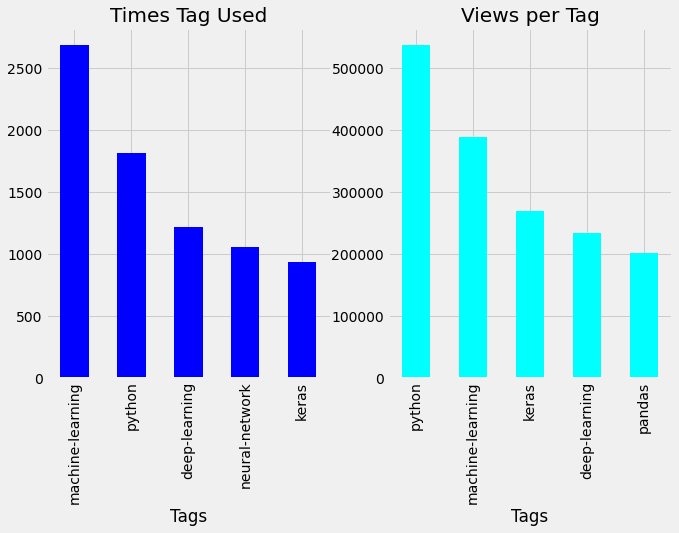

In [608]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('fivethirtyeight')

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.title('Times Tag Used')
plt.xlabel('Tags')
used.head().plot(kind='bar', colormap='winter')
plt.subplot(1,2,2)
plt.title('Views per Tag')
views.head().plot(kind='bar', colormap='cool')

As you can see above, commonly used and most viewed tags generally overlap which makes sense since a commonly used tag has a higher chance of being seen on a post.

Some tags that are used in some posts are not related in an actual sense. A way to find these relationships would be to run correlations on rows (e.g. compare how often the tags appear with each other). You could also extend this with multiple correlations to find relationships between multiple tags.

From the top 10 tags of each, here's a list of the tags in common: python, machine-learning, deep-learning, neural-network, keras, tensorflow, classification, scikit-learn

## Deep Learning Across Time

Finally, we will look at deep learning and if it is just a fad or it is still growing in popularity. We will look at data gathered from the query:

In [609]:
'''
SELECT Id, CreationDate, Tags
  FROM posts
 WHERE PostTypeId = 1;
''';

First, we'll read the data in and convert the Tags column to a list.

In [610]:
all_data = pd.read_csv('all_questions.csv')
# Same tag conversion like done in an above cell
all_data['Tags'] = all_data['Tags'].str.replace('><',',').str.replace('<','').str.replace('>','').str.split(',')            
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            21576 non-null  int64 
 1   CreationDate  21576 non-null  object
 2   Tags          21576 non-null  object
dtypes: int64(1), object(2)
memory usage: 505.8+ KB


Second, we'll convert the CreationDate column to a datetime object.

In [611]:
all_data = all_data.astype({'CreationDate':'datetime64[ns]'})
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            21576 non-null  int64         
 1   CreationDate  21576 non-null  datetime64[ns]
 2   Tags          21576 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB


Third, we'll get the subset of rows that mention deep-learning.

In [612]:
names = {'deep-learning'}
# Get all rows that mention deep-learning
deep = all_data[all_data['Tags'].map(names.issubset)]

In [613]:
deep.head()

,Id,CreationDate,Tags
14,45442,2019-02-12 11:35:56,"[python, neural-network, deep-learning, keras]"
28,45467,2019-02-12 21:49:08,"[machine-learning, deep-learning]"
29,45469,2019-02-12 22:40:12,"[machine-learning, deep-learning, keras, sciki..."
55,45515,2019-02-13 15:18:07,"[machine-learning, neural-network, deep-learni..."
63,45530,2019-02-13 18:33:05,[deep-learning]


Finally, we group by the year to get the count.

In [614]:
all_count = all_data['CreationDate'].groupby(all_data["CreationDate"].dt.year).count()
deep_count = deep['CreationDate'].groupby(deep["CreationDate"].dt.year).count()

To analyze, we will concatenate the count side by side and then plot.

In [615]:
merged = pd.concat([all_count, deep_count], axis=1)
merged.columns = ['All Posts', 'Deep Learning Posts']
merged['Percentage Deep Learning'] = round(merged['Deep Learning Posts']*100.0/merged['All Posts'],2)
merged

,All Posts,Deep Learning Posts,Percentage Deep Learning
CreationDate,,,
2014,562,8,1.42
2015,1167,30,2.57
2016,2146,157,7.32
2017,2957,425,14.37
2018,5475,902,16.47
2019,8810,1216,13.80
2020,459,67,14.60


<AxesSubplot:title={'center':'Number of Deep Learning Posts Per Year'}, xlabel='Year'>

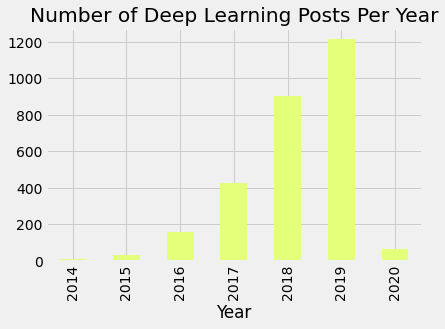

In [616]:
deep['CreationDate'].groupby(deep["CreationDate"].dt.year).count().plot(
    kind="bar", colormap='Wistia', xlabel='Year', title='Number of Deep Learning Posts Per Year')

As we can see in the figure above, deep learning has continued to grow in interest since 2014. The reason for the small figure in 2020 is that there is only the month of January to account for that year.

## Assocation Rules Analysis

We will next look at content that we can recommend that isn't as popular. Using association rules, let's find out what content to recommend based on strong relations with popular content. Let's use **machine-learning** as our tag of interest.

### Calculating Support Values

Support gives an idea of how frequent an itemset is in all of the groups. It is calculated as following:

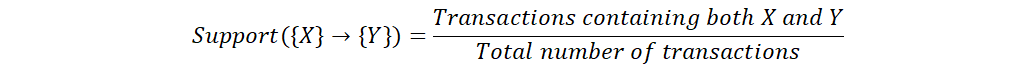

First, we will generate the itemsets from the list of tags.

In [617]:
# Sort the itemsets to be able to group them since lists are unhashable
sorts = se_data['Tags'].apply(lambda x: sorted(x))
sorts.head()

0                      [data-mining, machine-learning]
1    [linear-regression, machine-learning, regressi...
2         [forecast, forecasting, python, time-series]
3                [machine-learning, pca, scikit-learn]
4             [bigdata, data, dataset, speech-to-text]
Name: Tags, dtype: object

In [618]:
# For future calculations
num_rows = len(sorts)
num_rows

8839

Since we are only interested in itemsets with machine-learning, let's first filter for rows without machine-learning. We will also filter out single item lists.

In [619]:
mask = sorts.apply(
    lambda row: 
    'machine-learning' in row
    and (True if len(row) > 1 else False)
)
row_results = sorts[mask]
row_results.head()

0                       [data-mining, machine-learning]
1     [linear-regression, machine-learning, regressi...
3                 [machine-learning, pca, scikit-learn]
9     [cnn, deep-learning, keras, machine-learning, ...
11                           [machine-learning, theory]
Name: Tags, dtype: object

In [620]:
len(row_results)

2575

Next, we will calculate the support values by converting into tuples and grouping and dividing by the total number of rows.

In [621]:
results = row_results.apply(tuple).to_frame().value_counts()/num_rows
results.head(10)

Tags                                             
(machine-learning, python)                           0.002602
(machine-learning, neural-network)                   0.002376
(deep-learning, machine-learning)                    0.002036
(classification, machine-learning)                   0.001923
(deep-learning, machine-learning, neural-network)    0.001810
(machine-learning, python, scikit-learn)             0.001697
(machine-learning, regression)                       0.001584
(decision-trees, machine-learning)                   0.001358
(machine-learning, svm)                              0.001358
(machine-learning, statistics)                       0.001244
dtype: float64

Now, let's see the plot of values in order to get a sense of where to create a minimum support threshold.

<AxesSubplot:>

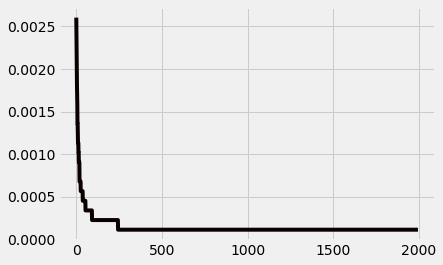

In [656]:
results.reset_index().plot(legend=False,colormap='hot')

We could calculate the second derivative to get this minimum. Looking at the graph, if it was smoothed, we can see it somewhere between 0.0000 and 0.0005. For now, we'll just index the first set of values that are above 10% of the highest value.

In [623]:
cutoff = np.where(results > results[0]*0.1)[0][-1]
cutoff

91

In [624]:
itemsets = results[:cutoff]

To get the unique items and drop machine-learning which should be the first value in results:

In [625]:
items = itemsets.to_frame().reset_index().explode('Tags')['Tags'].drop_duplicates().reset_index(drop=True).to_frame()
items = items.iloc[1: , :]
items.head()

,Tags
1,python
2,neural-network
3,deep-learning
4,classification
5,scikit-learn


### Calculating Confidence Values

Confidence defines the likeliness of occurrence of consequent on the cart given that the group already has the antecedents.

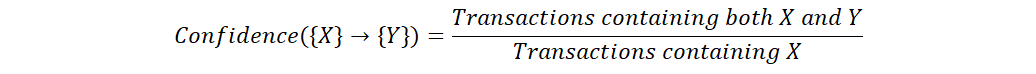

Since we have 1 antecedent (machine-learning), we will see the confidences of other the other 57 tags depending on machine-learning.

In [626]:
# Get the denominator
machine_learning_count = used['machine-learning']
machine_learning_count

2693

In [627]:
# Create numeric column
items['Confidence'] = 0.0

In [628]:
# Knowing that the results df already has machine-learning in each row
# We just need to check for the item and divide by denominator
for item in items['Tags']:
    items.loc[items['Tags'] == item,'Confidence'] = row_results.apply(
        lambda row: item in row).sum() / machine_learning_count

In [629]:
# Let's rename the Tags column to what it is: the Consequent column
items = items.rename({'Tags':'Consequent'},axis=1).sort_values('Confidence',ascending=False)
items.head()

,Consequent,Confidence
1,python,0.185295
3,deep-learning,0.159302
2,neural-network,0.135908
4,classification,0.096175
16,keras,0.072410


Above, we can see that the consequent confidence values with the consequent 'machine-learning'. Now, for the final act, we must get the lift values.

### Calculating Lift Values

Lift controls for the support (frequency) of the consequent while calculating the conditional probability of occurrence of {Y} given {X}.

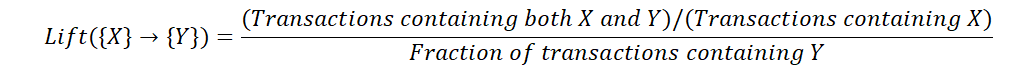

Since we have the top part of the equation, we just divide by the fraction of transactions with the consequent to get the lift.

In [630]:
items['Lift'] = 0.0

In [631]:
for item in items['Consequent']:
    items.loc[items['Consequent'] == item,'Lift'] = \
    items.loc[items['Consequent'] == item,'Confidence'] / (float(used[item]) / num_rows)

In [632]:
items = items.sort_values('Lift',ascending=False)
items.head()

,Consequent,Confidence,Lift
12,machine-learning-model,0.051615,2.036730
45,kaggle,0.008912,1.831933
29,k-nn,0.008912,1.575462
28,data-science-model,0.033049,1.570521
23,predictive-modeling,0.045674,1.523442


A value of lift less than 1 shows that having machine-learning {X} tagged does not increase the chances of occurrence of the consequent {Y} being tagged in spite of the rule showing a high confidence value. A value of lift greater than 1 vouches for high association between {Y} and {X}. The higher the value of lift, the greater the chances of preference for {Y} in the content given {X}.

Finally, let's see how popular the content above is in order to select for content that isn't as popular, but should be.

In [633]:
rankings = pd.DataFrame((used.index))
rankings['Rank'] = rankings.index + 1
rankings = rankings.rename({0:'Consequent'},axis=1)
rankings.head()

,Consequent,Rank
0,machine-learning,1
1,python,2
2,deep-learning,3
3,neural-network,4
4,keras,5


In [639]:
ranked_items = items.merge(rankings,on='Consequent')

In [645]:
ranked_items[(ranked_items['Lift'] > 1)].sort_values('Rank',ascending=False).head()

,Consequent,Confidence,Lift,Rank
11,hardware,0.001857,1.367589,237
12,matrix-factorisation,0.003713,1.367589,168
28,q-learning,0.004456,1.064502,121
1,kaggle,0.008912,1.831933,105
5,boosting,0.008169,1.473647,97


In [647]:
se_data['FavoriteCount'].value_counts()

0     7607
1      953
2      205
3       43
4       12
5        8
7        4
6        4
11       1
16       1
8        1
Name: FavoriteCount, dtype: int64

Seen above, we can recommend the above consequents to go alongside machine-learning. The rankings go from 1 to 526, so some of the topics are not as popular.

## Other Popularity Features

Finally, let's look at scores and favourite counts to get the top tags for those categories.

In [654]:
scores = se_data.explode('Tags').groupby('Tags')['Score'].mean().sort_values(ascending=False)
scores.head()

Tags
data-wrangling              4.600000
summarunner-architecture    4.000000
data-product                3.666667
.net                        3.000000
proximal-svm                3.000000
Name: Score, dtype: float64

In [655]:
favorites = se_data.explode('Tags').groupby('Tags')['Score'].sum().sort_values(ascending=False)
favorites.head()

Tags
machine-learning    2515
python              1475
deep-learning       1127
neural-network      1021
keras                785
Name: Score, dtype: int64

<AxesSubplot:title={'center':'Total Favorites'}, xlabel='Tags'>

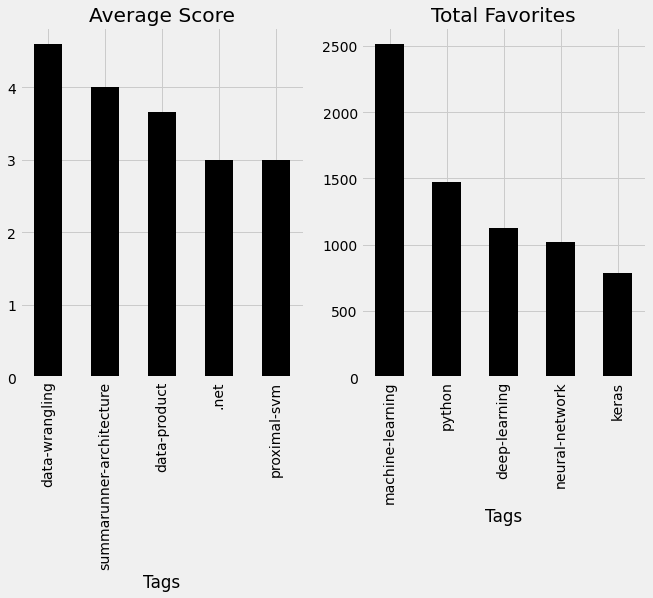

In [658]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.title('Average Score')
plt.xlabel('Tags')
scores.head().plot(kind='bar', colormap='afmhot')
plt.subplot(1,2,2)
plt.title('Total Favorites')
favorites.head().plot(kind='bar', colormap='gist_heat')

## Conclusions

While we focused on DSSE, other related data science sites such as Kaggle can help us analyze more data and topics. This type of analysis done above can also be done to other sites that use a tag system to explicitly distinguish the types of content inside.